In [7]:
import pandas as pd

# load imdb csv file into dataframe
imdb = pd.read_csv("./movies_with_SplitGenres.csv" )
imdb.head(2)

,movie_title,title_year,director_name,gross,budget,content_rating,country,duration,actor_1_facebook_likes,genres,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Avatar,2009.0,James Cameron,760505847.0,237000000.0,3,USA,178.0,1000.0,Action|Adventure|Fantasy|Sci-Fi,...,0,0,0,0,0,1,0,0,0,0
1,Pirates of the Caribbean: At World's End,2007.0,Gore Verbinski,309404152.0,300000000.0,3,USA,169.0,40000.0,Action|Adventure|Fantasy,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(imdb.ROI_band.unique())

list(le.classes_)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [9]:
#Using content rating & adjusted budget, duration, dir_adj_av_gross and genres to predict gross earnings
X = imdb.loc[:, ['content_rating','adj_budget','duration','dir_adj_av_gross','Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime','Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror','Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport','Thriller', 'War', 'Western']]
y = imdb.loc[:, 'ROI_band'].values 


In [10]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

#testing a range of classifiers.. 
from sklearn                        import metrics, svm
from sklearn.linear_model           import LinearRegression
from sklearn.linear_model           import LogisticRegression
from sklearn.tree                   import DecisionTreeClassifier
from sklearn.neighbors              import KNeighborsClassifier
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.naive_bayes            import GaussianNB
from sklearn.svm                    import SVC
from sklearn.ensemble import RandomForestClassifier

trainingData    = X_train
trainingScores  = y_train 
predictionData  = X_test 
predictionScores = y_test

clf = KNeighborsClassifier()
clf.fit(trainingData, trainingScores)
print("KNeighborsClassifier:", clf.score(predictionData, predictionScores))
#print(clf.predict(predictionData))

clf = RandomForestClassifier(n_estimators=40)
clf.fit(trainingData, trainingScores)
print("RandomForestClassifier:",clf.score(predictionData, predictionScores) )
#print(clf.predict(predictionData))

clf = LogisticRegression()
clf.fit(trainingData, trainingScores)
print("LogisticRegression:", clf.score(predictionData, predictionScores))
#print(clf.predict(predictionData))

clf = DecisionTreeClassifier()
clf.fit(trainingData, trainingScores)
print("DecisionTreeClassifier:", clf.score(predictionData, predictionScores))
#print(clf.predict(predictionData))

clf = LinearDiscriminantAnalysis()
clf.fit(trainingData, trainingScores)
print("LinearDiscriminantAnalysis:",  clf.score(predictionData, predictionScores))
#print(clf.predict(predictionData))

clf = GaussianNB()
clf.fit(trainingData, trainingScores)
print("GaussianNB:", clf.score(predictionData, predictionScores))
#print(clf.predict(predictionData))

clf = SVC()
clf.fit(trainingData, trainingScores)
print("SVC:", clf.score(predictionData, predictionScores) )
#print(clf.predict(predictionData))


KNeighborsClassifier: 0.46485260771
RandomForestClassifier: 0.458049886621
LogisticRegression: 0.452380952381
DecisionTreeClassifier: 0.40022675737
LinearDiscriminantAnalysis: 0.404761904762
GaussianNB: 0.40589569161
SVC: 0.396825396825


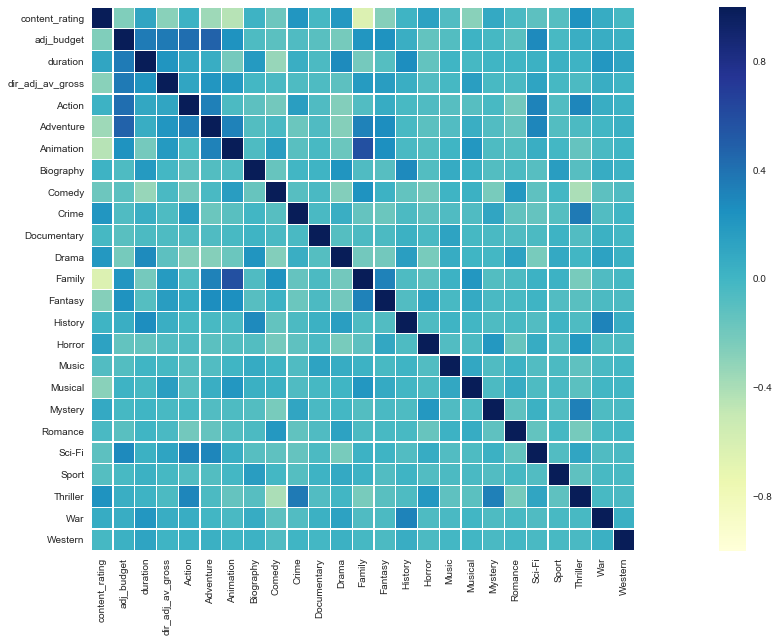

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# GETTING Correllation matrix
corr_mat = X.astype(float).corr(method='pearson')
plt.figure(figsize=(30,10))

#X.head()
sns.heatmap(corr_mat,linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='white')
#sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')